# Limpieza de Datos
Para realizar la limpieza de datos, seguiremos un proceso meticuloso que aborda tanto los problemas identificados durante la exploración inicial como los desafíos comunes presentes en los datos en bruto. Este paso es esencial, ya que asegura que el análisis posterior sea preciso, confiable y significativo.

### Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga del dataframe

In [2]:
df = pd.read_csv("../data/processed/combined_data.csv")

## Identificación de inconsistencias

In [3]:
# Valores nulos por columna
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

**Observación:** Encontramos un total de 393 datos nulos, todos ellos en la columna "Arrival Delay in Minutes" representado aproximadamente un 0.30% del total de filas de nuestro Dataframe.

In [4]:
# Filas duplicadas
df.duplicated().sum()

0

**Nota:** Se ha validado que no existen filas duplicadas en nuestro DataFrame.

## Menejo de valores nulos

In [5]:
# Asignamos una variable a los datos modificados y eliminamos los valores nulos
df_cleaned = df.dropna()

In [6]:
# Confirmamos la limpieza de valores nulos
df_cleaned.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Correción de tipos de datos

In [6]:
# Corregir el tipo de dato float de la columna "Arrival Delay in Minutes" a int
df_cleaned["Arrival Delay in Minutes"] = df_cleaned["Arrival Delay in Minutes"].astype("int64")

C:\Users\JoseLuis\AppData\Local\Temp\ipykernel_7068\453960683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Arrival Delay in Minutes"] = df_cleaned["Arrival Delay in Minutes"].astype("int64")


In [8]:
# Confirmamos la corrección de tipo de dato
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Unnamed: 0                         129487 non-null  int64 
 1   id                                 129487 non-null  int64 
 2   Gender                             129487 non-null  object
 3   Customer Type                      129487 non-null  object
 4   Age                                129487 non-null  int64 
 5   Type of Travel                     129487 non-null  object
 6   Class                              129487 non-null  object
 7   Flight Distance                    129487 non-null  int64 
 8   Inflight wifi service              129487 non-null  int64 
 9   Departure/Arrival time convenient  129487 non-null  int64 
 10  Ease of Online booking             129487 non-null  int64 
 11  Gate location                      129487 non-null  int64

## Manejo de Outliers (valores atípicos)

Confirmaremos la presencia de valores atípicos en las columnas "Arrival Delay in Minutes" y "Departure Delay in Minutes".

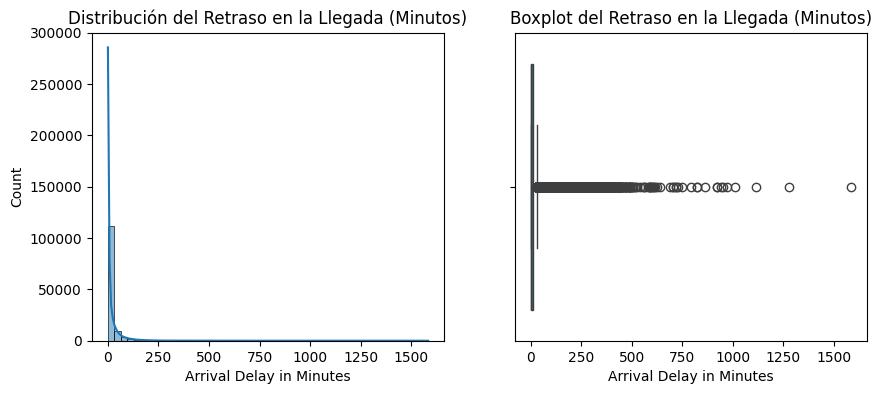

In [7]:
# Representamos los datos dentro de nuestras columnas para identificiar de manera visual datos atípicos
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned["Arrival Delay in Minutes"], bins=50, kde=True)
plt.title('Distribución del Retraso en la Llegada (Minutos)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned["Arrival Delay in Minutes"])
plt.title('Boxplot del Retraso en la Llegada (Minutos)')

plt.show()

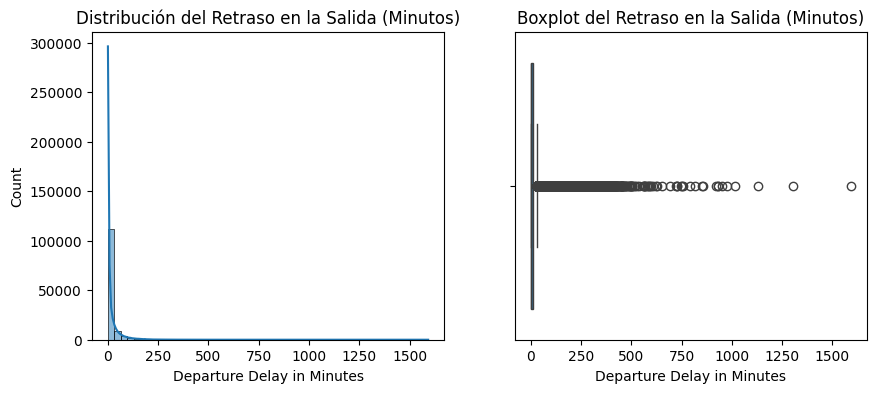

In [9]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned["Departure Delay in Minutes"], bins=50, kde=True)
plt.title('Distribución del Retraso en la Salida (Minutos)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned["Departure Delay in Minutes"])
plt.title('Boxplot del Retraso en la Salida (Minutos)')

plt.show()

In [8]:
# Creamos una función para identificar los valores atípicos
def identificar_outliers(data, col):

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar los datos sin outliers
    df_sin_outliers = data[(data[col] >= limite_inferior) & (data[col] <= limite_superior)]

    # Filtrar los datos que son outliers
    outliers = data[(data[col] < limite_inferior) | (data[col] > limite_superior)]
    
    return df_sin_outliers, outliers

In [11]:
# Usamos nuestra la fución "indentificar_outliers" en nuestra columna "Arrival Delay in Minutes", con la cual creamos dos dataframes, "df_sin_outliers" y "outliers"
df_sin_outliers, outliers = identificar_outliers(df_cleaned, "Arrival Delay in Minutes")

In [12]:
# Usamos nuevamente nuestra función en la columna "Departure Delay in Minutes" pero esta vez en el dataframe "df_sin_outliers"
df_sin_outliers, outliers = identificar_outliers(df_sin_outliers, "Departure Delay in Minutes")

In [15]:
# Analisamos el resultado del dataframe "df_sin_outliers"
df_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96286 entries, 1 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         96286 non-null  int64 
 1   id                                 96286 non-null  int64 
 2   Gender                             96286 non-null  object
 3   Customer Type                      96286 non-null  object
 4   Age                                96286 non-null  int64 
 5   Type of Travel                     96286 non-null  object
 6   Class                              96286 non-null  object
 7   Flight Distance                    96286 non-null  int64 
 8   Inflight wifi service              96286 non-null  int64 
 9   Departure/Arrival time convenient  96286 non-null  int64 
 10  Ease of Online booking             96286 non-null  int64 
 11  Gate location                      96286 non-null  int64 
 12  Food and

**Nota:** Dado que una cantidad significativa de datos en nuestro DataFrame son outliers (33,201 registros, equivalentes al 25.64% del total), hemos decidido imputar estos valores atípicos en lugar de eliminarlos.

In [26]:
# Creamos una función la cual calcula la media de nuestra columna y reemplaza los valores atípicos por la media
def remplazar_outliers(data, col):
    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR 

    # Calcula la media

    media = data[col].mean()

    # Reemplaza los outliers por la media

    data[col] = data[col].apply(lambda x: media if x < limite_inferior or x > limite_superior else x)

    return data

In [31]:
# Usamos nuestra función para reemplazar valores atípicos por la media en nuestras columnas

df_media_outliers = remplazar_outliers(df_cleaned, "Arrival Delay in Minutes")

df_media_outliers = remplazar_outliers(df_media_outliers, "Departure Delay in Minutes")

C:\Users\JoseLuis\AppData\Local\Temp\ipykernel_7068\1626743117.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: media if x < limite_inferior or x > limite_superior else x)
C:\Users\JoseLuis\AppData\Local\Temp\ipykernel_7068\1626743117.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: media if x < limite_inferior or x > limite_superior else x)


In [32]:
# Confirmamos de manera estadistica nuestro cambio
df_media_outliers.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,44158.973480,64958.335169,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,5.231441,5.581680
std,31209.526335,37489.781165,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,7.555046,7.963373
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16230.000000,32494.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38966.000000,64972.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71440.500000,97415.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,32.000000


In [33]:
df_media_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129487 non-null  int64  
 1   id                                 129487 non-null  int64  
 2   Gender                             129487 non-null  object 
 3   Customer Type                      129487 non-null  object 
 4   Age                                129487 non-null  int64  
 5   Type of Travel                     129487 non-null  object 
 6   Class                              129487 non-null  object 
 7   Flight Distance                    129487 non-null  int64  
 8   Inflight wifi service              129487 non-null  int64  
 9   Departure/Arrival time convenient  129487 non-null  int64  
 10  Ease of Online booking             129487 non-null  int64  
 11  Gate location                      129487 no

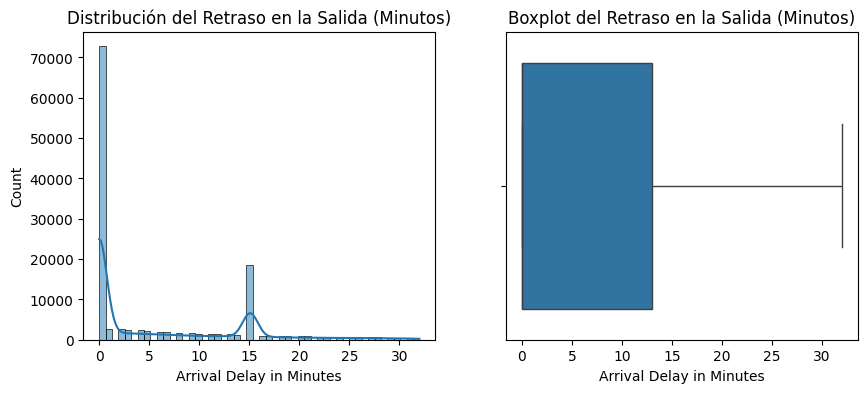

In [34]:
# Confirmamos de manera visual la nueva distrabución de nuestros datos en ambas columnas intervenidas
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_media_outliers["Arrival Delay in Minutes"], bins=50, kde=True)
plt.title('Distribución del Retraso en la Salida (Minutos)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_media_outliers["Arrival Delay in Minutes"])
plt.title('Boxplot del Retraso en la Salida (Minutos)')

plt.show()

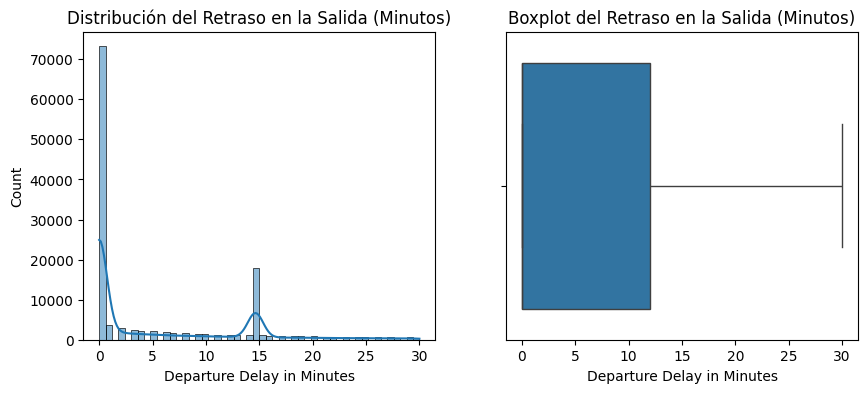

In [35]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_media_outliers["Departure Delay in Minutes"], bins=50, kde=True)
plt.title('Distribución del Retraso en la Salida (Minutos)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_media_outliers["Departure Delay in Minutes"])
plt.title('Boxplot del Retraso en la Salida (Minutos)')

plt.show()

**Observaciones:** A lo largo del proceso, nuestro DataFrame ha evolucionado a medida que hemos identificado y corregido problemas desde la adquisición de los datos. Este es un paso crucial y común en el análisis de datos, ya que una limpieza exhaustiva es esencial para obtener resultados precisos y confiables.

Con la fase de exploración y limpieza de datos concluida, estamos listos para proceder con el análisis.

### Guardamos nuestro dataframe limpio

In [36]:
# Guardamos nuestro dataframe limpio en nuestra carpeta "data/processed"
df_sin_outliers.to_csv("../data/processed/cleaning_data.csv", index=False)